<a href="https://colab.research.google.com/github/geetika-create/crop-production/blob/main/CropProductionDataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

# **Data Loading**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop Production Dataset - Imputation Dataset (2).csv to Crop Production Dataset - Imputation Dataset (2).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Crop Production Dataset - Imputation Dataset (2).csv']))
print(df)

    Year  Precipitation  Deforestation  Carbon Dioxide  Methane  Temperature  \
0   1961            639            NaN          194.00    64.33    -4.946920   
1   1962            654            NaN          206.99    65.99    -4.826949   
2   1963            646            NaN          210.91    66.87    -4.580211   
3   1964            659            NaN          237.58    70.50    -5.316351   
4   1965            643            NaN          251.92    72.86    -5.457571   
..   ...            ...            ...             ...      ...          ...   
58  2019            686           2.17          579.01   125.16    -3.619446   
59  2020            731           1.19          524.21   110.82    -3.555461   
60  2021            688           2.52          537.48   114.91    -2.753712   
61  2022            694           2.30          547.66   117.05    -3.573582   
62  2023            627           8.57          545.48   118.72    -1.805844   

    Pesticides  Nitrogen  Phosphorous  

# **KNN**

In [ ]:
# features used to derive imputation
precipitation_list = df['Precipitation'].tolist()
carbonDioxide_list = df['Carbon Dioxide'].tolist()
methane_list = df['Methane'].tolist()
temperature_list = df['Temperature'].tolist()
nitrogen_list = df['Nitrogen'].tolist()
phosphorous_list = df['Phosphorous'].tolist()
production_list = df['Production'].tolist()

# columns for imputation
irrigation_list = df['Irrigation'].tolist()
deforestration_list = df['Deforestation'].tolist()
pesticides_list = df['Pesticides'].tolist()

In [ ]:
data1 = list(zip(precipitation_list[40:], carbonDioxide_list[40:], methane_list[40:], temperature_list[40:], nitrogen_list[40:], phosphorous_list[40:], production_list[40:]))
print(data1)

data2 = list(zip(precipitation_list[29:], carbonDioxide_list[29:], methane_list[29:], temperature_list[29:], nitrogen_list[29:], phosphorous_list[29:], production_list[29:]))
print(data2)

data3 = list(zip(precipitation_list[30:], carbonDioxide_list[30:], methane_list[30:], temperature_list[30:], nitrogen_list[30:], phosphorous_list[30:], production_list[30:]))
print(data3)

knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(data1, deforestration_list[40:])

knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(data2, pesticides_list[29:])

knn3 = KNeighborsRegressor(n_neighbors=2)
knn3.fit(data3, irrigation_list[30:])

[(660, 558.98, 121.98, -3.030084, 1.541191, 0.613796, 45.437366), (652, 564.26, 124.42, -4.271507, 1.642988, 0.656295, 38.725275), (663, 581.19, 123.52, -3.7182093, 1.649912, 0.685815, 51.779228), (678, 576.29, 127.21, -4.764981, 1.53945, 0.610336, 54.370505), (704, 570.4, 126.35, -3.1651356, 1.776685, 0.693121, 54.666575), (669, 566.32, 129.92, -2.2725153, 1.371962, 0.615799, 52.800596), (697, 589.96, 128.17, -3.947485, 2.068032, 0.743994, 51.68887), (691, 574.21, 124.89, -4.1480646, 1.909243, 0.671423, 60.54878), (636, 541.13, 118.13, -3.9720433, 1.91455, 0.561811, 54.5515), (675, 554.31, 118.92, -1.6897383, 2.051264, 0.650749, 52.544508), (680, 562.83, 119.64, -3.3942096, 2.490486, 0.822189, 55.213562), (684, 561.77, 122.58, -2.9375496, 2.787716, 0.768247, 59.501953), (663, 568.59, 123.24, -3.9773796, 2.461, 0.857, 74.325209), (676, 564.94, 128.46, -4.110524, 2.543, 0.942, 60.500968), (670, 563.0, 127.16, -3.5110137, 2.581, 1.004, 62.951116), (696, 553.71, 122.51, -2.6479042, 2.461,

KNeighborsRegressor(n_neighbors=2)

In [ ]:
new_data1 = list(zip(precipitation_list[:40], carbonDioxide_list[:40], methane_list[:40], temperature_list[:40], nitrogen_list[:40], phosphorous_list[:40], production_list[:40]))
new_data2 = list(zip(precipitation_list[:29], carbonDioxide_list[:29], methane_list[:29], temperature_list[:29], nitrogen_list[:29], phosphorous_list[:29], production_list[:29]))
new_data3 = list(zip(precipitation_list[:30], carbonDioxide_list[:30], methane_list[:30], temperature_list[:30], nitrogen_list[:30], phosphorous_list[:30], production_list[:30]))

deforestation_list_imputed = []
pesticides_list_imputed = []
irrigation_list_imputed = []

for i in range(len(precipitation_list[:40])):
  prediction = knn1.predict([new_data1[i]])
  deforestation_list_imputed.append(float(prediction[0]))

print(deforestation_list_imputed)

for i in range(len(precipitation_list[:29])):
  prediction = knn2.predict([new_data2[i]])
  pesticides_list_imputed.append(float(prediction[0]))

print(pesticides_list_imputed)

for i in range(len(precipitation_list[:30])):
  prediction = knn3.predict([new_data3[i]])
  irrigation_list_imputed.append(float(prediction[0]))

print(irrigation_list_imputed)

[1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.54, 1.19, 1.54, 1.54, 1.54, 1.54, 1.19, 2.52, 1.54, 2.52, 2.52, 1.54, 1.54, 2.52, 1.54, 1.54, 2.52, 2.52, 1.54, 2.52, 1.54, 2.52, 1.54, 2.52, 2.52, 1.54, 1.54, 1.54, 1.54, 2.52, 2.52, 1.54, 2.08, 1.35]
[0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.0294325, 0.0294325, 0.029523, 0.0294325, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.0294325, 0.0293875, 0.029523, 0.0294325, 0.0294325, 0.029523, 0.029523, 0.029523, 0.029523, 0.0294325, 0.029523, 0.029342]
[4.0023, 4.0023, 4.0023, 4.0023, 4.0023, 4.0023, 4.0023, 4.0136, 4.0023, 4.0023, 4.0023, 4.0023, 4.0136, 4.0136, 4.0023, 4.0136, 4.0136, 4.0023, 4.0136, 4.0136, 4.0023, 4.0023, 4.0136, 4.0136, 4.0136, 4.0136, 4.0023, 4.0136, 4.024900000000001, 4.0136]


In [ ]:
for i in range(len(irrigation_list_imputed)):
  print(irrigation_list_imputed[i])

4.0023
4.0023
4.0023
4.0023
4.0023
4.0023
4.0023
4.0136
4.0023
4.0023
4.0023
4.0023
4.0136
4.0136
4.0023
4.0136
4.0136
4.0023
4.0136
4.0136
4.0023
4.0023
4.0136
4.0136
4.0136
4.0136
4.0023
4.0136
4.024900000000001
4.0136


# **Descriptive Statistics**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop Production Dataset - Dataset Final.csv to Crop Production Dataset - Dataset Final.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['Crop Production Dataset - Dataset Final.csv']))
print(df1)

    Year  Precipitation  Deforestation  Carbon Dioxide  Methane  Temperature  \
0   1961            639           1.19          194.00    64.33    -4.946920   
1   1962            654           1.19          206.99    65.99    -4.826949   
2   1963            646           1.19          210.91    66.87    -4.580211   
3   1964            659           1.19          237.58    70.50    -5.316351   
4   1965            643           1.19          251.92    72.86    -5.457571   
..   ...            ...            ...             ...      ...          ...   
58  2019            686           2.17          579.01   125.16    -3.619446   
59  2020            731           1.19          524.21   110.82    -3.555461   
60  2021            688           2.52          537.48   114.91    -2.753712   
61  2022            694           2.30          547.66   117.05    -3.573582   
62  2023            627           8.57          545.48   118.72    -1.805844   

    Pesticides  Nitrogen  Phosphorus  I

In [ ]:
df1_table = df1.describe().drop(columns=['Year'])
df1_table

,Precipitation,Deforestation,Carbon Dioxide,Methane,Temperature,Pesticides,Nitrogen,Phosphorus,Irrigation,Production
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,661.222222,2.035397,458.055238,102.934603,-4.162602,0.043998,1.392373,0.646675,4.257525,48.736077
std,23.663940,0.995584,110.246190,19.514967,0.974909,0.022662,0.851361,0.236413,4.130561,13.570692
min,615.000000,1.190000,194.000000,64.330000,-6.767322,0.029206,0.098348,0.196763,2.180387,15.493218
25%,646.000000,1.540000,401.845000,88.625000,-4.826802,0.029523,0.677200,0.532255,3.819500,36.704893
50%,660.000000,1.940000,463.390000,103.660000,-4.271507,0.029523,1.338500,0.634500,4.002300,51.779228
75%,675.500000,2.520000,560.375000,121.815000,-3.564522,0.049426,1.911897,0.715500,4.013600,57.087922
max,731.000000,8.570000,589.960000,129.920000,-1.689738,0.098304,3.116000,1.194000,36.250000,75.270895


In [ ]:
def identify_outlier(data):
  q1 = data.quantile(0.30)
  q3 = data.quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return len(outliers)

print(identify_outlier(df1['Production']))
print(identify_outlier(df1['Temperature']))
print(identify_outlier(df1['Carbon Dioxide']))
print(identify_outlier(df1['Methane']))
print(identify_outlier(df1['Deforestation']))
print(identify_outlier(df1['Precipitation']))
print(identify_outlier(df1['Pesticides']))
print(identify_outlier(df1['Phosphorus']))
print(identify_outlier(df1['Irrigation']))

1
2
0
0
1
1
8
20
18


Distribution

/tmp/ipython-input-1956500180.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


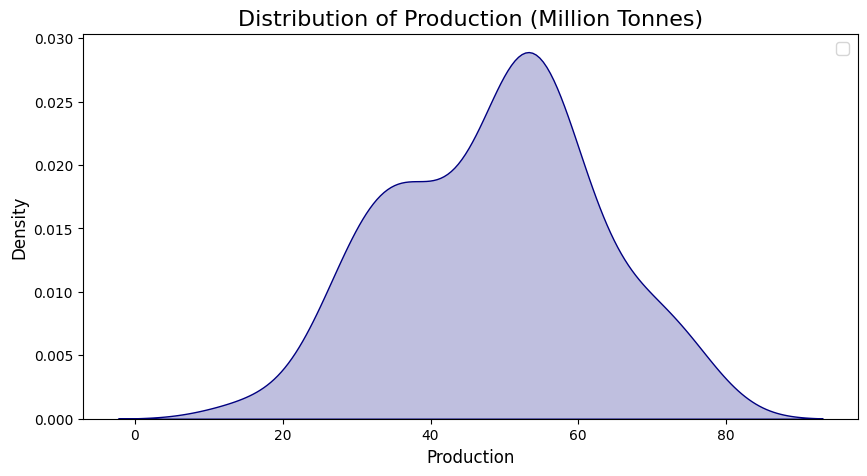

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df1['Production'], color='navy', fill=True)

plt.title('Distribution of Production (Million Tonnes)', fontsize=16)
plt.xlabel('Production', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.show()

Feature Impact on Production

Correlation: 0.899


/tmp/ipython-input-3857529506.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Nitrogen'], p(df1['Nitrogen']), "r--", linewidth=2, color='black')


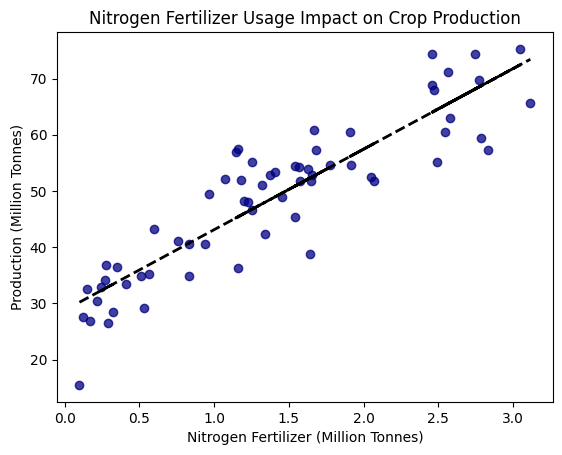


Correlation: 0.555


/tmp/ipython-input-3857529506.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Temperature'], p(df1['Temperature']), "r--", linewidth=2, color='black')


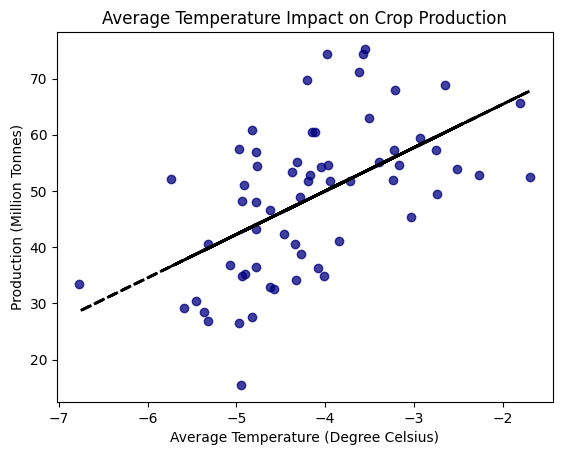


Correlation: 0.813


/tmp/ipython-input-3857529506.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Carbon Dioxide'], p(df1['Carbon Dioxide']), "r--", linewidth=2, color='black')


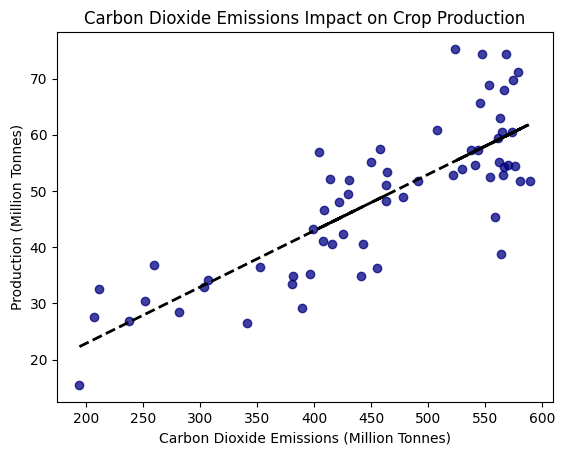


Correlation: 0.794


/tmp/ipython-input-3857529506.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Methane'], p(df1['Methane']), "r--", linewidth=2, color='black')


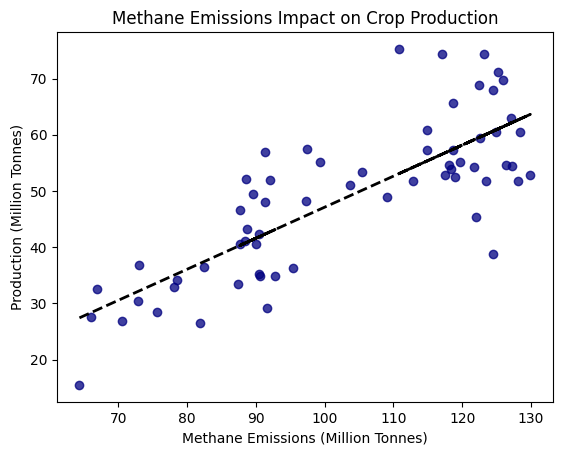


Correlation: 0.389


/tmp/ipython-input-3857529506.py:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Deforestation'], p(df1['Deforestation']), "r--", linewidth=2, color='black')


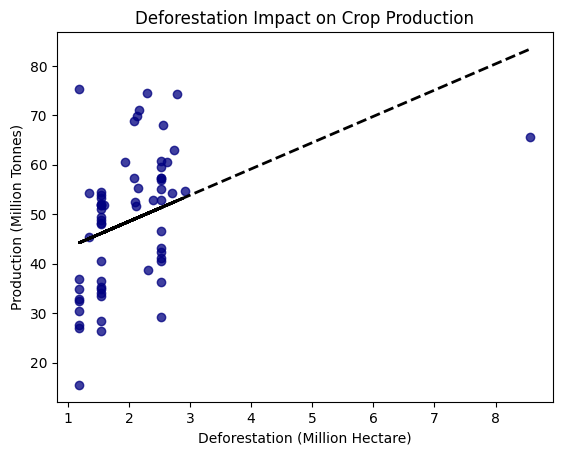


Correlation: 0.524


/tmp/ipython-input-3857529506.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Precipitation'], p(df1['Precipitation']), "r--", linewidth=2, color='black')


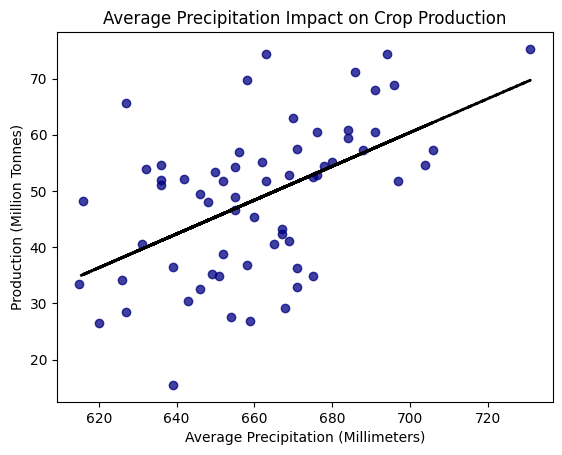


Correlation: 0.745


/tmp/ipython-input-3857529506.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Pesticides'], p(df1['Pesticides']), "r--", linewidth=2, color='black')


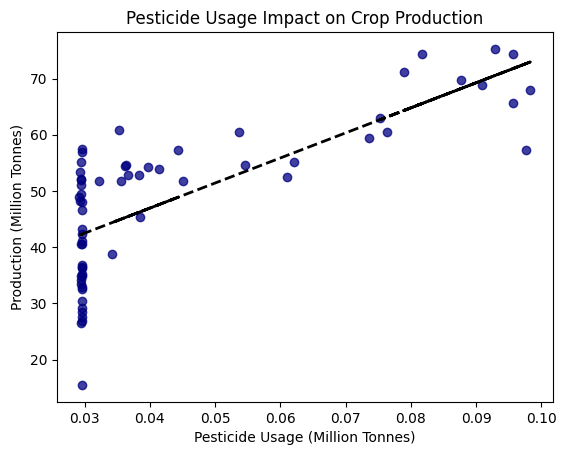


Correlation: 0.870


/tmp/ipython-input-3857529506.py:123: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Phosphorus'], p(df1['Phosphorus']), "r--", linewidth=2, color='black')


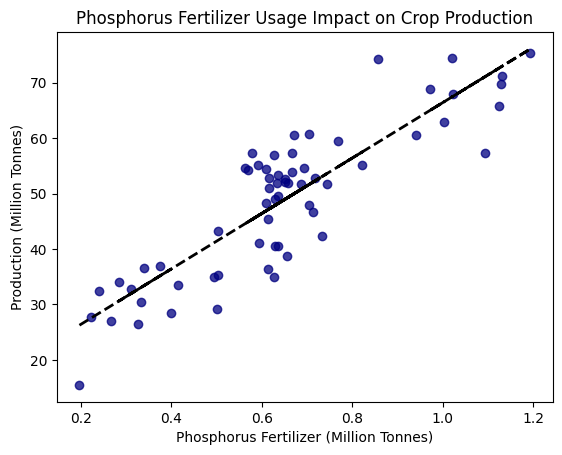


Correlation: 0.120


/tmp/ipython-input-3857529506.py:140: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df1['Irrigation'], p(df1['Irrigation']), "r--", linewidth=2, color='black')


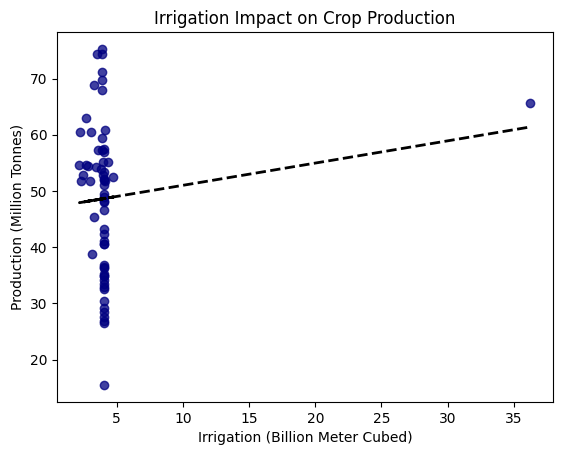

In [ ]:
# nitrogen fertilizer
correlation = df1['Nitrogen'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Nitrogen'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Nitrogen'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Nitrogen'], p(df1['Nitrogen']), "r--", linewidth=2, color='black')

plt.xlabel('Nitrogen Fertilizer (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Nitrogen Fertilizer Usage Impact on Crop Production')
plt.show()

print()

# average temperature
correlation = df1['Temperature'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Temperature'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Temperature'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Temperature'], p(df1['Temperature']), "r--", linewidth=2, color='black')

plt.xlabel('Average Temperature (Degree Celsius)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Average Temperature Impact on Crop Production')
plt.show()

print()

# carbon dioxide emissions
correlation = df1['Carbon Dioxide'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Carbon Dioxide'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Carbon Dioxide'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Carbon Dioxide'], p(df1['Carbon Dioxide']), "r--", linewidth=2, color='black')

plt.xlabel('Carbon Dioxide Emissions (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Carbon Dioxide Emissions Impact on Crop Production')
plt.show()

print()

# methane emissions
correlation = df1['Methane'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Methane'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Methane'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Methane'], p(df1['Methane']), "r--", linewidth=2, color='black')

plt.xlabel('Methane Emissions (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Methane Emissions Impact on Crop Production')
plt.show()

print()

# deforestation (tree cover loss)
correlation = df1['Deforestation'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Deforestation'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Deforestation'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Deforestation'], p(df1['Deforestation']), "r--", linewidth=2, color='black')

plt.xlabel('Deforestation (Million Hectare)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Deforestation Impact on Crop Production')
plt.show()

print()

# precipitation
correlation = df1['Precipitation'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Precipitation'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Precipitation'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Precipitation'], p(df1['Precipitation']), "r--", linewidth=2, color='black')

plt.xlabel('Average Precipitation (Millimeters)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Average Precipitation Impact on Crop Production')
plt.show()

print()

# pesticide usage
correlation = df1['Pesticides'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Pesticides'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Pesticides'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Pesticides'], p(df1['Pesticides']), "r--", linewidth=2, color='black')

plt.xlabel('Pesticide Usage (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Pesticide Usage Impact on Crop Production')
plt.show()

print()

# phosphorous fertilizer
correlation = df1['Phosphorus'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Phosphorus'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Phosphorus'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Phosphorus'], p(df1['Phosphorus']), "r--", linewidth=2, color='black')

plt.xlabel('Phosphorus Fertilizer (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Phosphorus Fertilizer Usage Impact on Crop Production')
plt.show()

print()

# irrigation availability
correlation = df1['Irrigation'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Irrigation'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Irrigation'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Irrigation'], p(df1['Irrigation']), "r--", linewidth=2, color='black')

plt.xlabel('Irrigation (Billion Meter Cubed)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Irrigation Impact on Crop Production')
plt.show()


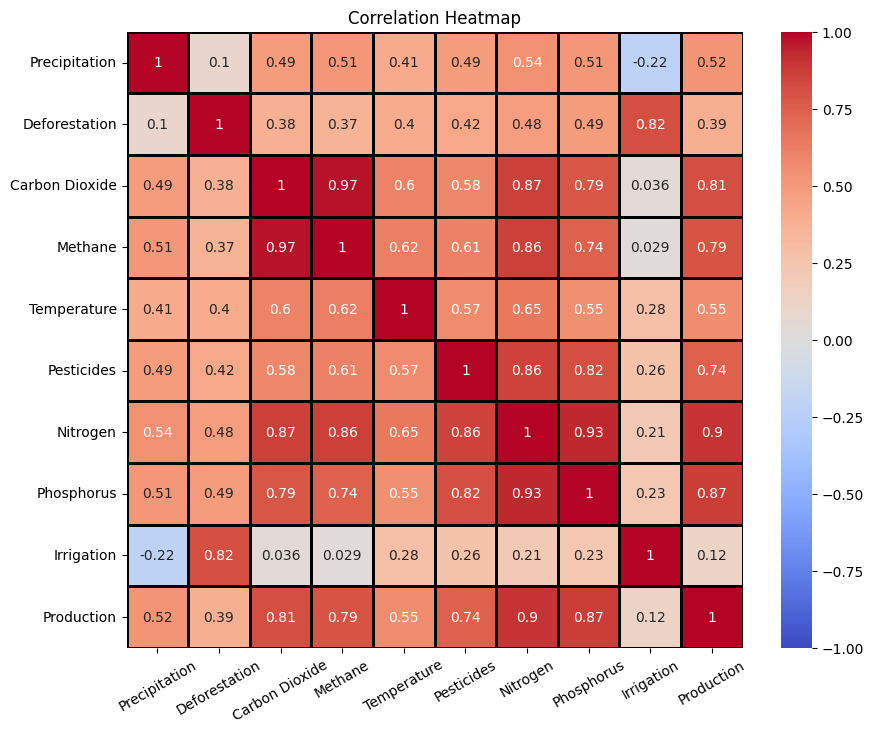

In [ ]:
df1_corr = df1.corr(numeric_only=True)
df1_corr_no_year = df1_corr.drop(columns=['Year'], index=['Year'])
plt.figure(figsize=(10,8))
sns.heatmap(df1_corr_no_year, annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=2, linecolor='black', square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30);

# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
import matplotlib.cm as cm
cmap = cm.get_cmap("Blues", 256)

/tmp/ipython-input-675974710.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", 256)


Split Dataset

In [ ]:
X = df1.drop(['Year', 'Production'], axis=1)
y = df1['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Train Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100,
                                 bootstrap=True,
                                 oob_score=True,
                                 random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

Evaluate Model

In [ ]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 6.34
Mean Absolute Error: 4.77
R-squared: 0.83


Feature Importances

          Feature  Importance
6        Nitrogen    0.342316
5      Pesticides    0.260508
3         Methane    0.172910
7      Phosphorus    0.077064
2  Carbon Dioxide    0.057878
4     Temperature    0.029942
0   Precipitation    0.029206
1   Deforestation    0.023784
8      Irrigation    0.006392

Nitrogen          0.252744
Pesticides        0.214130
Methane           0.060195
Carbon Dioxide    0.045529
Phosphorus        0.022649
Deforestation     0.020526
Temperature       0.016984
Precipitation     0.002200
Irrigation       -0.000103
dtype: float64



<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

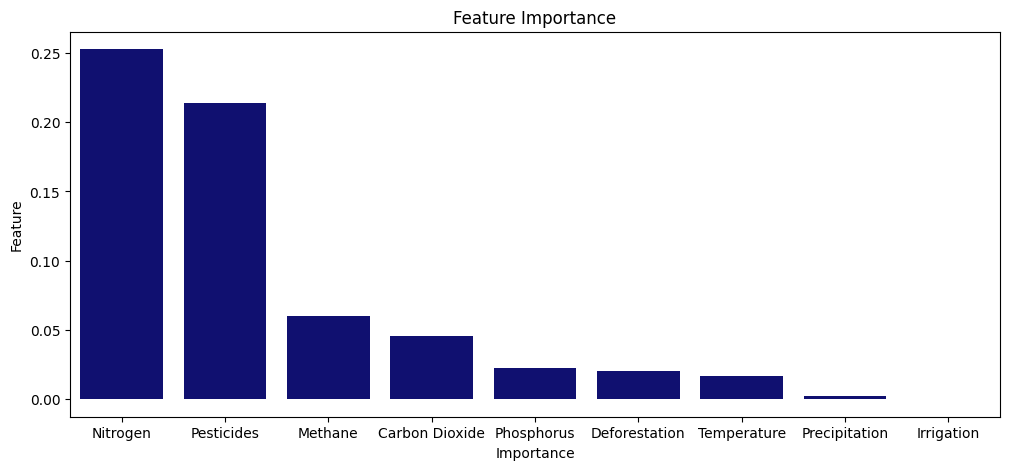

In [ ]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
print()

perm = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

perm_importances = pd.Series(
    perm.importances_mean,
    index=X.columns
).sort_values(ascending=False)

print(perm_importances)
print()

plt.figure(figsize=(12, 5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
sns.barplot(x=perm_importances.index, y=perm_importances.values, color='navy')

# **Permutation Importance**

/tmp/ipython-input-2984147739.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


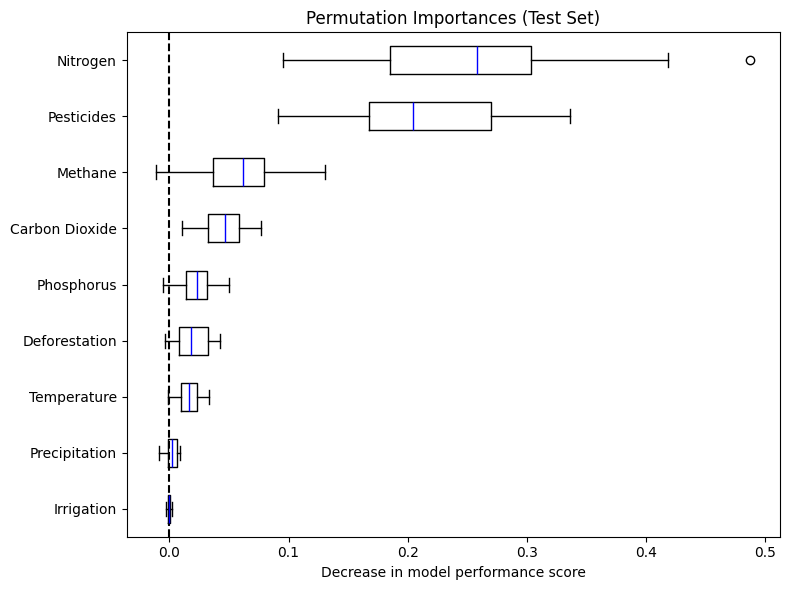

In [ ]:
sorted_idx = perm.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(
    perm.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_test.columns)[sorted_idx],
    medianprops=dict(color="blue", linewidth=1),
)

ax.axvline(x=0, color="black", linestyle="--")

ax.set_title("Permutation Importances (Test Set)")
ax.set_xlabel("Decrease in model performance score")

plt.tight_layout()
plt.show()

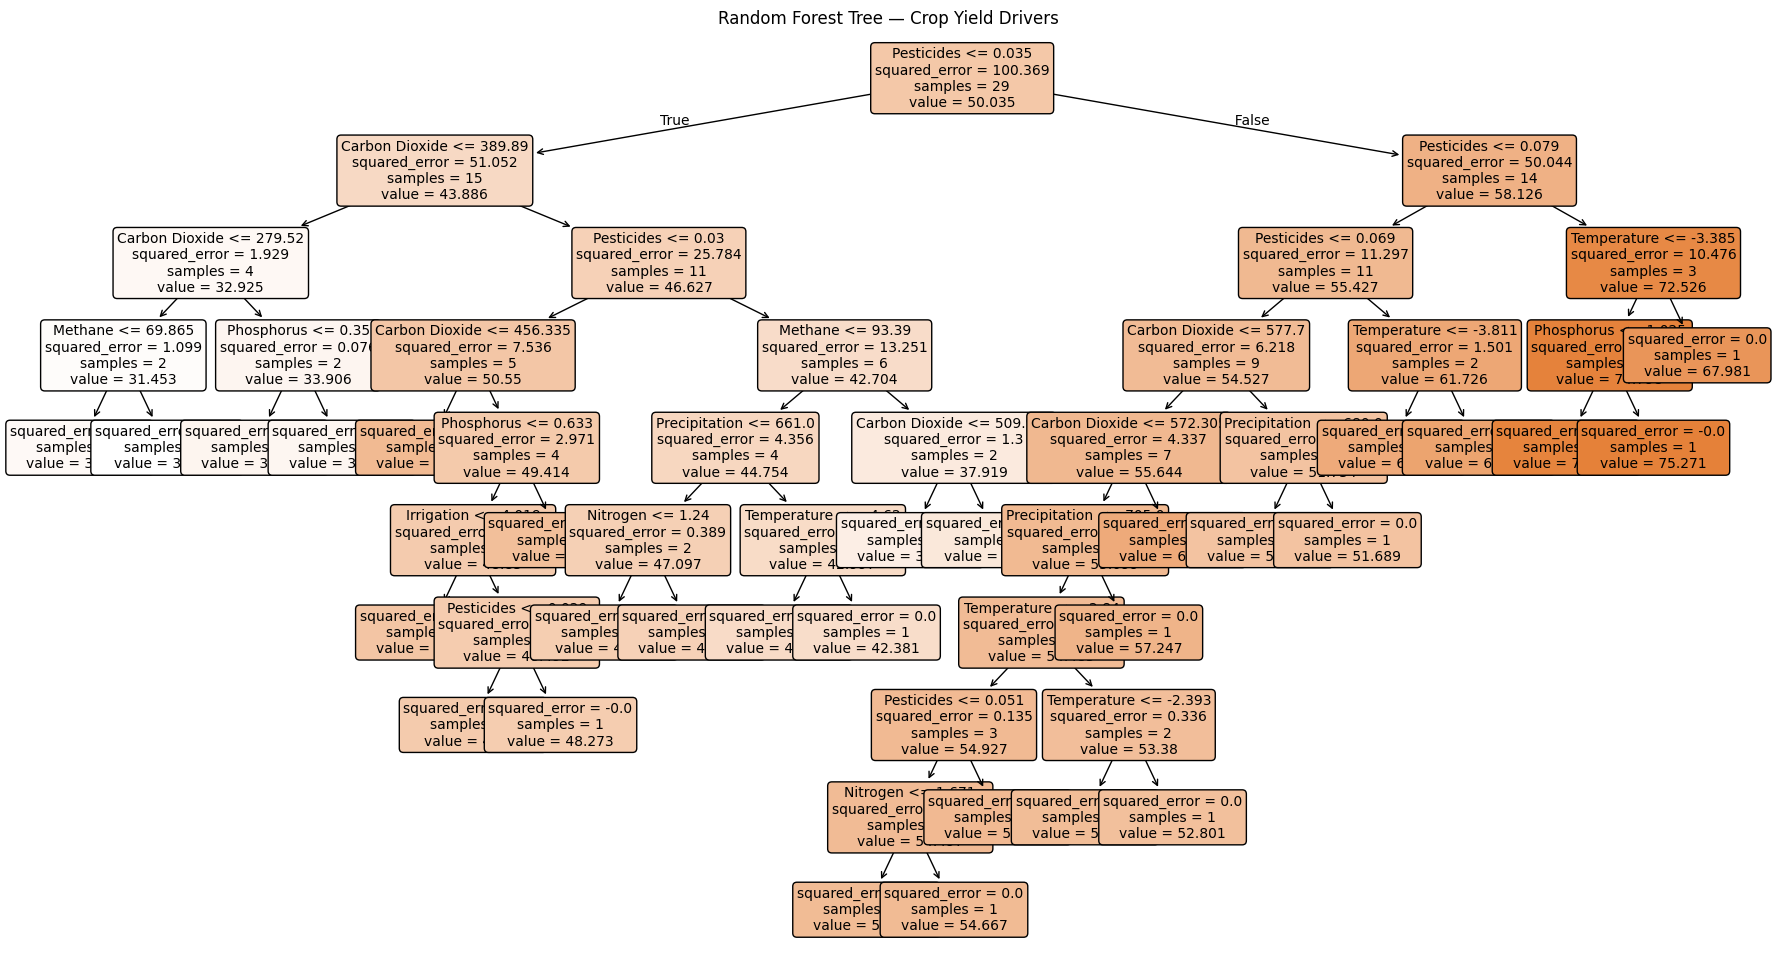

In [ ]:
tree = rf_model.estimators_[0]

plt.figure(figsize=(22, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Random Forest Tree — Crop Yield Drivers")
plt.show()